# Introduction to Neural Networks

## Import packages

In [1]:
import tensorflow as tf 
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
#X'in represent ettiği değeri alır.
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

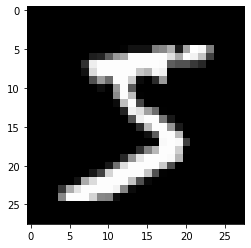

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

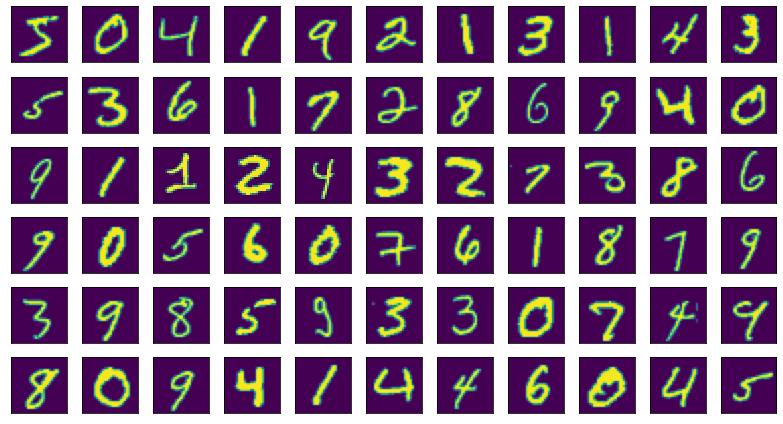

In [7]:
plt.figure(figsize=(11,6))
for i in range(66): 
    plt.subplot(6,11,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

## Preprocessing the image data

In [8]:
image_height, image_width= 28,28

In [9]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)
#vektörleştirme

(60000, 784)
(10000, 784)


In [10]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
#rgb code for black:(0,0,0), white=(255,255,255)
#rescale our data 0 to 1
X_train/=255.0
X_test/=255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
#10 number 10 diff bins
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

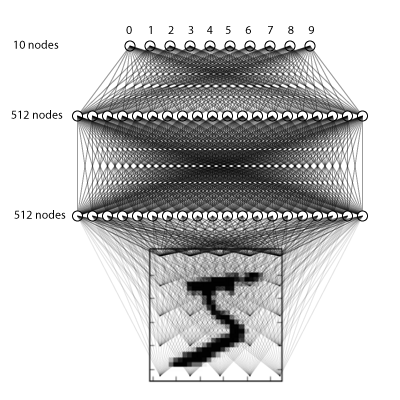

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
#y=x*a+bias
#parametre sayısı
print(784*512+512)
print(512*512+512)
print(512*10+10)

401920
262656
5130


## Train the model

In [18]:
#history= model.fit(X_train,y_train, epochs=20, batch_size=512, validation_split=0.1)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1815 - accuracy: 0.9453 - val_loss: 0.1064 - val_accuracy: 0.9658
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0573 - accuracy: 0.9816 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0857 - val_accuracy: 0.9752
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.1100 - val_accuracy: 0.9732
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0849 - val_accuracy: 0.9797
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0976 - val_accurac

## What is the accuracy of the model?

### Plot the accuracy of the training model

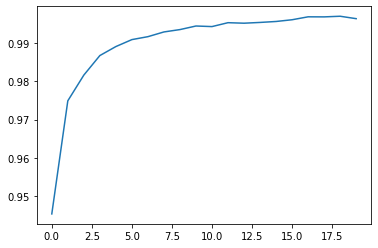

In [19]:
plt.plot(history.history['accuracy'])

### Plot the accurancy of training and validation set

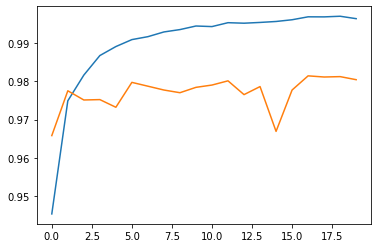

In [20]:
plt.plot(history.history['accuracy'])
#blue
plt.plot(history.history['val_accuracy'])
#orange 

### Accuracy of training and validation with loss

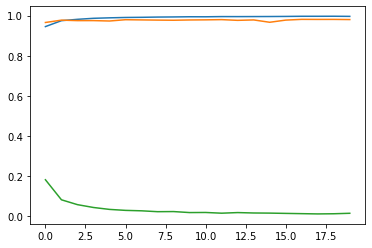

In [21]:
plt.plot(history.history['accuracy'])
#blue
plt.plot(history.history['val_accuracy'])
#oran
plt.plot(history.history['loss'])
#green

## Evaluating the model

In [22]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1642 - accuracy: 0.9804


In [23]:
score

[0.1641601324081421, 0.980400025844574]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


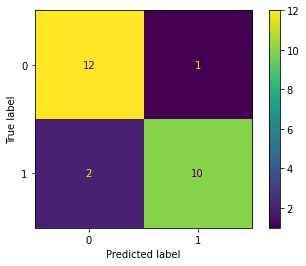

In [35]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Run a prediction

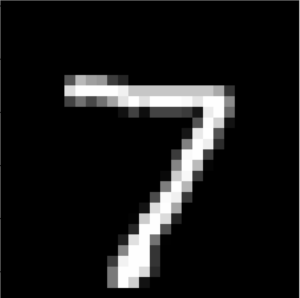

In [24]:
from IPython import display
display.Image("./image.png")

In [30]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import img_to_array
from keras.models import load_model

model.save('model.h5')

# load and prepare the image
def load_image(filename):
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1,28*28)
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    img = load_image('image.png')
    model = load_model('model.h5')
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

run_example()

7


## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?